# Predicting Market Price of Cars

we will predict cars' market prices based on information about technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

The data we will use to train our model have multiple columns, most of which are features or attribute we will use to train our model, and 'price' column is target column we are predicting. Here are more detailed description about the data set:
https://archive.ics.uci.edu/ml/datasets/automobile

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [2]:
cars = pd.read_csv('imports-85.data')

In [3]:
cars.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The you'll notice that the column names don't match the ones in the dataset's documentation.The dataset took the first row as the header. 

In [4]:
col = ["symboling", "normalized-losses","make","fuel-type", "aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine_type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
cars = pd.read_csv('imports-85.data', names=col)

In [6]:
cars.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine_type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

We will drop all of following columns because they are mostly non-numeric values
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
engine_type          205 non-null object
num-of-cylinders     205 non-null object
fuel-system          205 non-null object


Here are the columns that are left:
normalized-losses    205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object

In [8]:
col_1 = [ "normalized-losses", "wheel-base","length","width","height","curb-weight","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
cars_1 = cars[col_1].copy()

In [9]:
cars_1.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
cars_1 = cars_1.replace("?", np.nan)
cars_1.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500


In [11]:
cars_1 = cars_1.astype('float')
cars_1.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

for the null value, we can drop the null values from the dataframe, 

In [12]:
cars_1 = cars_1.dropna(subset=['price'])
#only remove the missing values from price column

In [13]:
cars_1 = cars_1.fillna(cars_1.mean())
#use mean() for each column to fill the millsing values

In [14]:
cars_1.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [15]:
cars_1.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:
price_col = cars_1['price']
cars_1 = (cars_1 - cars_1.min()) / (cars_1.max() - cars_1.min())
cars_1['price'] = price_col

In [17]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    knn.fit(train_df[[train_col]], train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse_col = {}
columns = cars_1.columns.drop('price')
#drop the target column from the train data set

for col in columns:
    rmse = knn_train_test(col, 'price', cars_1)
    rmse_col[col] = rmse


In [18]:
rmse_series = pd.Series(rmse_col)
rmse_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-ratio    6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

the feature that we use to predict with lowerest error is 'horsepower'

In [24]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_list = [1,3,5,7,9]
    rmse_list = {}
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        predictions = knn.predict(test_df[[train_col]])
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        rmse_list[k] = rmse
    return rmse_list

rmse_col = {}
columns = cars_1.columns.drop('price')
for col in columns:
    rmse_list = knn_train_test(col, 'price', cars_1)
    rmse_col[col] = rmse_list
    #for each of column, measure its accuracy for each k value
    
print(rmse_col)

{'length': {1: 4628.45550121557, 3: 5129.8358210721635, 9: 5383.054514833446, 5: 5427.2009608367125, 7: 5313.427720847974}, 'horsepower': {1: 4170.054848037801, 3: 4020.8492630885394, 9: 4515.135617419103, 5: 4037.0377131537603, 7: 4353.811860277134}, 'city-mpg': {1: 5901.143574354764, 3: 4646.746408727155, 9: 5465.209492527533, 5: 4766.422505090134, 7: 5232.523034167316}, 'highway-mpg': {1: 6025.594966720739, 3: 4617.305019788554, 9: 5278.358056953987, 5: 4630.026798588056, 7: 4796.061440186946}, 'height': {1: 8904.04645636071, 3: 8277.609643045525, 9: 7811.03606291223, 5: 8144.441042663747, 7: 7679.598124393773}, 'compression-ratio': {1: 8087.205346523092, 3: 7375.063685578359, 9: 7024.485525463435, 5: 6610.812153159129, 7: 6732.801282941515}, 'bore': {1: 8602.58848450066, 3: 6984.239489480916, 9: 6866.808502038413, 5: 6780.627784685976, 7: 6878.097965921532}, 'wheel-base': {1: 4493.734068810494, 3: 5120.161506064513, 9: 5738.405685192312, 5: 5461.553997873057, 7: 5448.1070513823315}

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

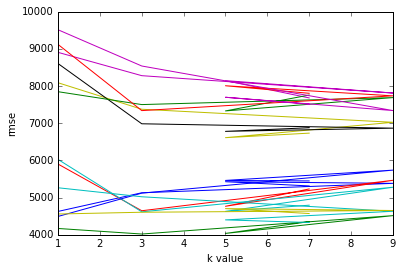

In [27]:
for c,v in rmse_col.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('rmse')

In [28]:
# Compute average RMSE across different `k` values for each feature.this is to find the best 2,3,n..n features based on lowest average rmse
feature_avg_rmse = {}
for c,v in rmse_col.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[c] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-ratio    7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [36]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_list = [5] #change the k value back to default value
    rmse_list = {}
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[train_col], train_df[target_col])
        predictions = knn.predict(test_df[train_col])
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        rmse_list[k] = rmse
    return rmse_list

features = [2,3,4,5]
rmse_features = {}
for f in range(2,6):
    rmse = knn_train_test(sorted_features[:f], 'price', cars_1)
    rmse_features[f] = rmse
print(rmse_features)

{2: {5: 3589.3132622073304}, 3: {5: 3305.9401397969677}, 4: {5: 3358.6915801682458}, 5: {5: 3665.546673045813}}


For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
Which k value is optimal for each model? How different are the k values and what do you think accounts for the differences?

In [41]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_list = [k for k in range(1,25)] #change the k value varing from 1 to 25
    rmse_list = {}
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[train_col], train_df[target_col])
        predictions = knn.predict(test_df[train_col])
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        rmse_list[k] = rmse
    return rmse_list

features = [2,3,4]
rmse_features = {}
for f in features:
    rmse = knn_train_test(sorted_features[:f], 'price', cars_1)
    rmse_features[f] = rmse
    
    print(rmse_features)

{2: {1: 4061.9613050304106, 2: 3497.49936199118, 3: 3402.8692636542114, 4: 3587.0044198356923, 5: 3589.3132622073304, 6: 3680.062981095498, 7: 3756.92796407086, 8: 3937.770418264052, 9: 4078.3485919700097, 10: 4163.828373808731, 11: 4297.135962941241, 12: 4370.753019740529, 13: 4500.462028689254, 14: 4604.156707686779, 15: 4595.345097101211, 16: 4605.433669910023, 17: 4611.2845838376215, 18: 4598.88218482117, 19: 4579.964891966457, 20: 4653.966845712387, 21: 4759.076059393234, 22: 4807.805949321809, 23: 4865.320887129985, 24: 4910.715769042787}}
{2: {1: 4061.9613050304106, 2: 3497.49936199118, 3: 3402.8692636542114, 4: 3587.0044198356923, 5: 3589.3132622073304, 6: 3680.062981095498, 7: 3756.92796407086, 8: 3937.770418264052, 9: 4078.3485919700097, 10: 4163.828373808731, 11: 4297.135962941241, 12: 4370.753019740529, 13: 4500.462028689254, 14: 4604.156707686779, 15: 4595.345097101211, 16: 4605.433669910023, 17: 4611.2845838376215, 18: 4598.88218482117, 19: 4579.964891966457, 20: 4653.966

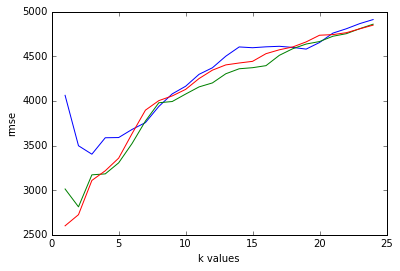

In [42]:
for f, v in rmse_features.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k values')
    plt.ylabel('rmse')
    

# Conclusion
the rmse increases as k values incerase for 2, 3, 4 features. It suggest that incorporating too many neighbors will create noise and enlarge the variance, and the optimized k values is around 4 or 5 still